## DATA IMPORT

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score

In [3]:
df = pd.read_csv('address_cleaned.csv')
df

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Activo,Egresado_Egresado,Egresado_Retirado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
156,Bootcamp en Desarrollo Web,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Luner, miércoles y viernes de 8: pm a 10:00 pm",1.0,0.0,0.0,1.0,0.0,0.0,1.0
157,Bootcamp en Data Science y Machine Learning en...,gmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,Bootcamp en Data Science y Machine Learning en...,hotmail.com,2900.0,Distrito Nacional,1,Transferencia,0,Aprender algo nuevo,Maestros de Talendig,"Martes, Jueves y Sábados",1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [4]:
df["Egresado_Activo"].value_counts()

0.0    142
1.0     18
Name: Egresado_Activo, dtype: int64

Se eliminara la columna de egresados activos porque no existe una correlacion con el la columna objetivo. 

In [5]:
df = df.drop(df.loc[df["Egresado_Activo"] == 1].index)

In [6]:
df["Egresado_Activo"].value_counts()

0.0    142
Name: Egresado_Activo, dtype: int64

In [7]:
df1=df.drop(columns=["Egresado_Activo","Egresado_Retirado"])
df1.head()

,Entrenamiento,Email,Precios US,Ubicacion,Incluye pasantia,Metodo de pago,Estatus laboral,Razon de eleccion del bootcamp,Proveedores de bootcamp,Horario de los bootcamps,Egresado_Egresado,Primer contacto_Instagram,Primer contacto_WhatsApp,Condiciones de pago_Completo,Condiciones de pago_Cuotas
0,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
1,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Santo Domingo Este,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
2,Bootcamp en Desarrollo Web con C#,gmail.com,2900.0,Distrito Nacional,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Lunes, miércoles y viernes de 6:00pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0
3,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Distrito Nacional,0,Transferencia,0,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",0.0,1.0,0.0,0.0,1.0
4,Bootcamp en Desarrollo Web con Java,gmail.com,2900.0,Boca Chica,0,Transferencia,1,Crecimiento laboral,Maestros de Talendig,"Martes, jueves y viernes de 6:00 pm a 8:00 pm",1.0,1.0,0.0,0.0,1.0


In [8]:
df1.shape

(142, 15)

In [9]:
df1.isna().sum()

Entrenamiento                     0
Email                             0
Precios US                        0
Ubicacion                         0
Incluye pasantia                  0
Metodo de pago                    0
Estatus laboral                   0
Razon de eleccion del bootcamp    0
Proveedores de bootcamp           0
Horario de los bootcamps          0
Egresado_Egresado                 0
Primer contacto_Instagram         0
Primer contacto_WhatsApp          0
Condiciones de pago_Completo      0
Condiciones de pago_Cuotas        0
dtype: int64

## TRAIN TEST SPLIT

In [10]:
from sklearn.model_selection import train_test_split

X = df1.drop('Egresado_Egresado', axis=1)
y = df1['Egresado_Egresado']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# Primero, dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Luego, dividimos el conjunto de prueba en validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Verificar los tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento (X_train):", len(X_train))
print("Tamaño del conjunto de validación (X_val):", len(X_val))
print("Tamaño del conjunto de prueba (X_test):", len(X_test))
print("Tamaño del conjunto de entrenamiento (y_train):", len(y_train))
print("Tamaño del conjunto de validación (y_val):", len(y_val))
print("Tamaño del conjunto de prueba (y_test):", len(y_test))

Tamaño del conjunto de entrenamiento (X_train): 99
Tamaño del conjunto de validación (X_val): 21
Tamaño del conjunto de prueba (X_test): 22
Tamaño del conjunto de entrenamiento (y_train): 99
Tamaño del conjunto de validación (y_val): 21
Tamaño del conjunto de prueba (y_test): 22


In [11]:
X_test.shape

(22, 14)

In [12]:
X_train.shape

(99, 14)

## PREPROCESING

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [14]:
#Selectores
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
#Escaladores
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
#Pipe
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
#Transform
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
#Fit
col_transformer.fit(X_train)
# transform train and test
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [15]:
# Comprobacion
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (99, 42)




array([[ 0.4784976 , -0.50315461, -0.51887452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4784976 , -0.50315461, -0.51887452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4784976 , -0.50315461, -0.51887452, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.4784976 , -0.50315461, -0.51887452, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4784976 , -0.50315461,  1.92724822, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.4784976 , -0.50315461,  1.92724822, ...,  1.        ,
         0.        ,  0.        ]])

### Modelos Regresion Logistica

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import distplot

In [23]:
# Make an instance of the model
logreg = LogisticRegression(C = 1000)
# Create pipeline
logreg_pipe = make_pipeline(logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train_processed,y_train)
#Score
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.8585858585858586
0.7727272727272727


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<AxesSubplot:>

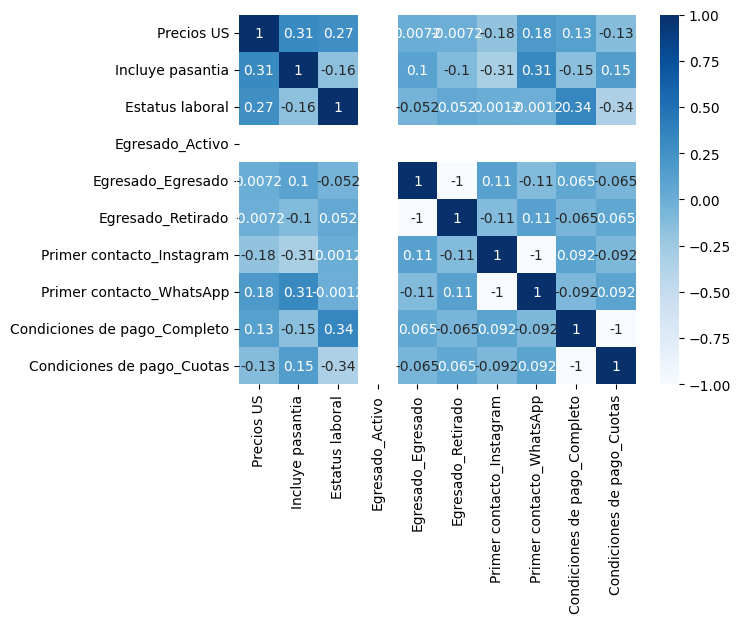

In [24]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)

{0.0001: 0.18181818181818182,
 0.001: 0.18181818181818182,
 0.01: 0.18181818181818182,
 0.1: 0.8181818181818182,
 1: 0.8181818181818182,
 10: 0.8181818181818182,
 100: 0.7727272727272727,
 1000: 0.7727272727272727}

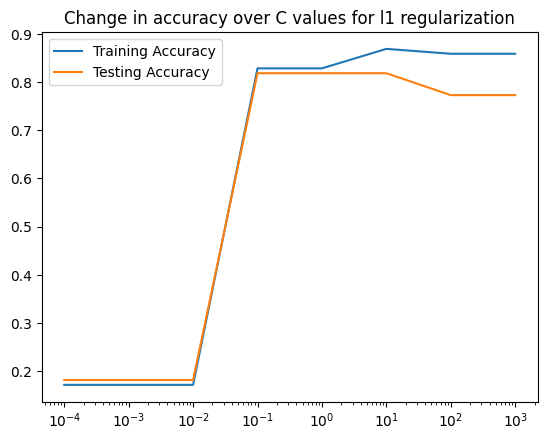

In [25]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed,y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend();
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.8181818181818182,
 0.001: 0.8181818181818182,
 0.01: 0.8181818181818182,
 0.1: 0.8181818181818182,
 1: 0.8181818181818182,
 10: 0.8181818181818182,
 100: 0.8181818181818182,
 1000: 0.7727272727272727}

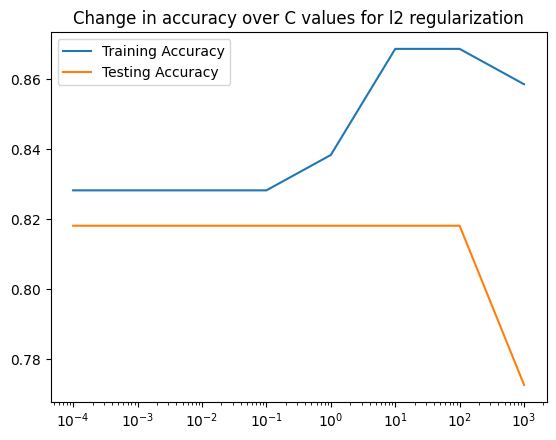

In [26]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(log_reg)
  log_reg_pipe.fit(X_train_processed,y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train_processed, y_train))
  test_scores.append(log_reg_pipe.score(X_test_processed, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Se probaron ambos tipos de penalizacion para mejorar el resultado del modelo. En vista de que los datos no tienen una alta correlacion, a pesar de que ambas penalizaciones arrojan resultados muy parecidos, se utilizara la penalizacion de l1, ya que la misma es mas apropiada para el fin. 

In [27]:
# Make an instance of the model
logreg = LogisticRegression(C=0.1, max_iter=1000, solver='liblinear', penalty='l1')
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train_processed,y_train)
#Score
print(logreg_pipe.score(X_train_processed, y_train))
print(logreg_pipe.score(X_test_processed, y_test))

0.8282828282828283
0.8181818181818182
